# Signal Reconstruction
The first cell, takes the origninal signal in `blue` and reconstructed signal (`orange`), that the evolutionary algorithm generated using weighted sum of the provided sub signals, and plot them. If only orange signal is visible, then we have a perfect match, else, the match is imperfect.

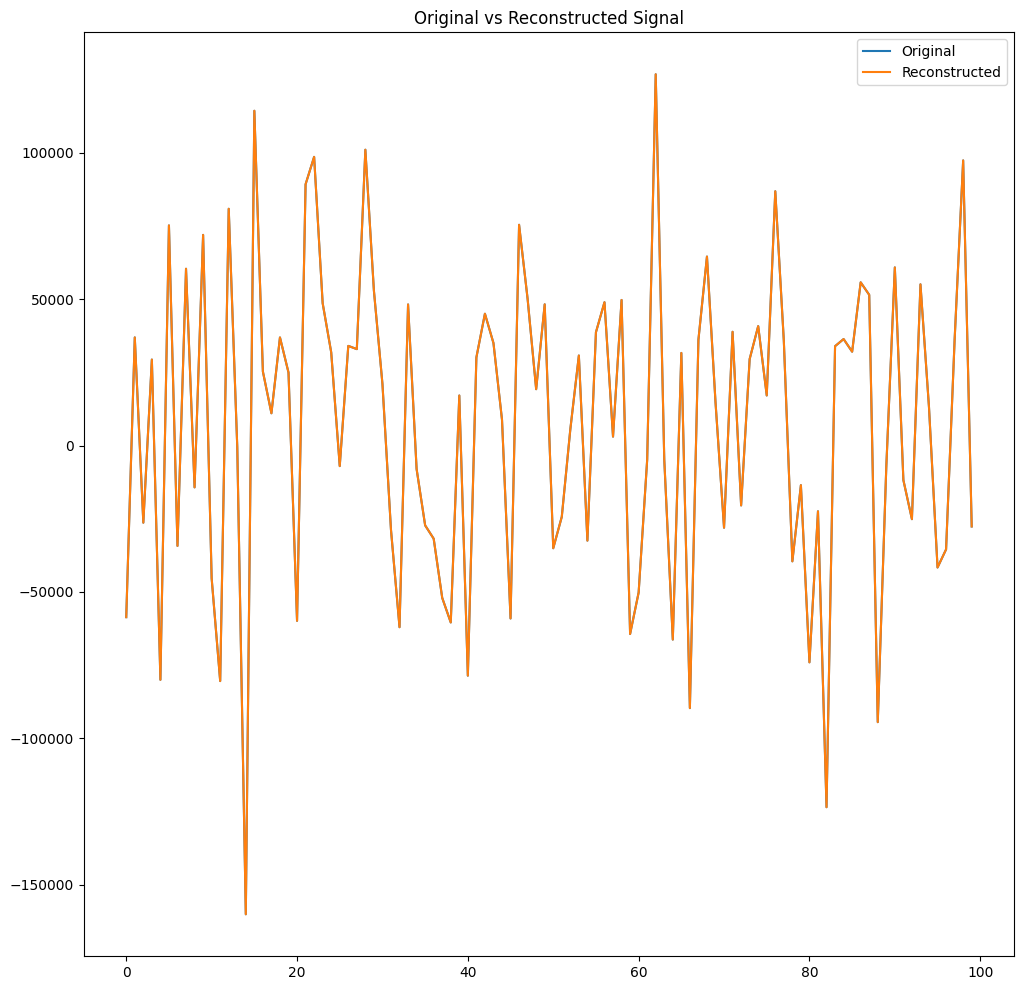

In [26]:
from matplotlib import pyplot as plt
import json
with open("data.json") as f:
    data = json.load(f)
    plt.figure(figsize=(12, 12))
    plt.title("Original vs Reconstructed Signal")
    plt.plot(data["originalTimeSeries"], label="Original")
    plt.plot(data["combinedTimeSeries"], label="Reconstructed")
    plt.legend()
    plt.show()

# Generating Data
In this cell we generate the data, that is of number of `iterations + 1`, quantity. The last entity is the actual optimal solution used for benchmark. Then if this data frame is more than 2 columns long, it is subjected to principle component analysis to compress it down to 2 components. Number of columns shows the number of wavelets the final signal is summation of.

In [27]:
import pandas as pd
def Generatedata(jsonData):
    df = pd.DataFrame()
    for key in list(jsonData["progression"][0]["coodrinates"].keys()):
        dataFragment = []
        for index in range(len(jsonData["progression"])):
            dataFragment.append(jsonData["progression"][index]["coodrinates"][key])
        df[key] = dataFragment
    columns = df.columns
    columns = sorted(columns)
    df = df[columns]

    optimal = pd.DataFrame(data=[jsonData["optimal"]["coodrinates"]])
    df = pd.concat([df, optimal], ignore_index=True)
    return df

dataframe = Generatedata(data)
dataframe

,1,10,2,3,4,5,6,7,8,9
0,7.977681,12.120737,13.425203,10.497160,11.320119,12.203752,8.084116,11.537771,15.027736,11.460517
1,6.222715,12.091471,13.211062,9.643153,11.952803,13.315949,7.846645,12.547240,12.761366,12.067215
2,5.286345,335.472059,11.644883,7.828597,12.795315,14.818363,4.673632,27.745579,41.037217,13.342035
3,2.940128,644.950139,11.163576,5.647961,120.333411,15.488065,3.528593,298.355495,982.715338,144.581510
4,3.144582,798.101187,142.493677,28.330363,141.591262,12.215094,1.835315,352.918331,1588.057054,170.850543
...,...,...,...,...,...,...,...,...,...,...
9996,1113.952619,1752.955298,898.610834,7741.410540,4266.855711,2909.958790,5742.092398,3556.683515,7604.344737,3671.124656
9997,1113.952619,1752.955298,898.610834,7741.410540,4266.855711,2909.958790,5742.092398,3556.683515,7604.344737,3671.124656
9998,1113.952619,1752.955298,898.610834,7741.410540,4266.855711,2909.958790,5742.092398,3556.683515,7604.344737,3671.124656
9999,1113.952619,1752.955298,898.610834,7741.410540,4266.855711,2909.958790,5742.092398,3556.683515,7604.344737,3671.124656


In [28]:
# !pip3 install -U scikit-learn
from sklearn.decomposition import PCA
def PerformPCA(dataFrame):
    if len(dataFrame.columns) != 2:
        pca = PCA(n_components=2)
        pca = pca.fit(dataFrame)
        df = pd.DataFrame(data=pca.transform(dataFrame))
        return df
    else:
        return dataframe
dataframe = PerformPCA(dataframe)
dataframe

,0,1
0,14148.639624,-73.454124
1,14149.567208,-73.771085
2,14082.481955,-191.274122
3,13456.365597,-709.946776
4,13099.480942,-984.775621
...,...,...
9996,-144.187048,-4.873151
9997,-144.187048,-4.873151
9998,-144.187048,-4.873151
9999,-144.187048,-4.873151


# Progression Plot
We then plot the aformentioned data to represent the progression of weightage values. If the plot reaches near the blue dot `optimal weightage`, we have converged to global minima, else we are stuck in a local minima. 

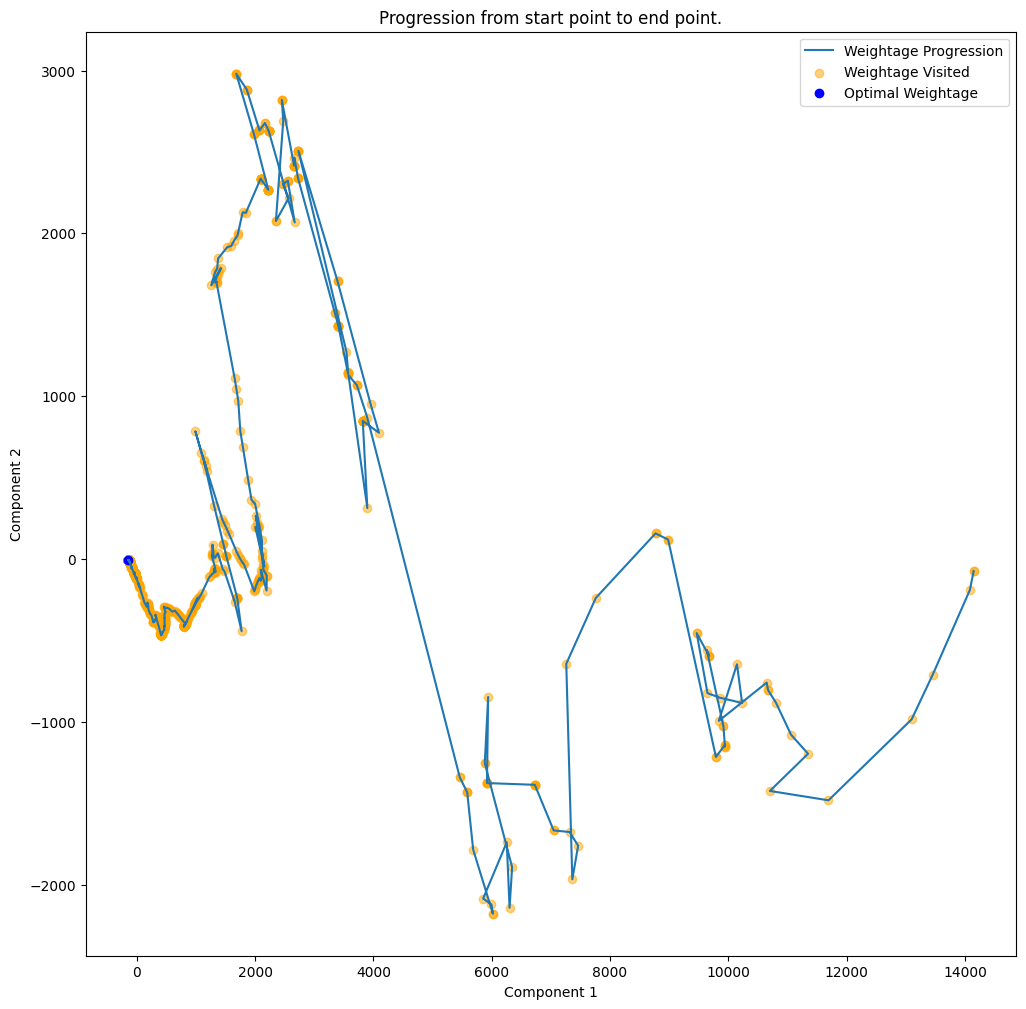

In [29]:
plt.figure(figsize=(12, 12))
plt.title("Progression from start point to end point.")
plt.plot(dataframe[0], dataframe[1], label="Weightage Progression")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.scatter(dataframe[0][:-1], dataframe[1][:-1], c="orange", alpha=0.5, label="Weightage Visited")
plt.scatter(x=dataframe[0][len(dataframe) - 2], y=dataframe[1][len(dataframe) - 2], c="blue", label="Optimal Weightage")
plt.legend()

# Loss Plot
 This shows the loss of the algorithm at each iteration. It is defined as:
 $$Loss = \frac{\sum|r_i - o_i|}{\sum |o_i|}$$
 where $r_i$ is reconstructed signal from first graph at a given iteration, and $o_i$ is the original signal that the algorithm is trying to fit.

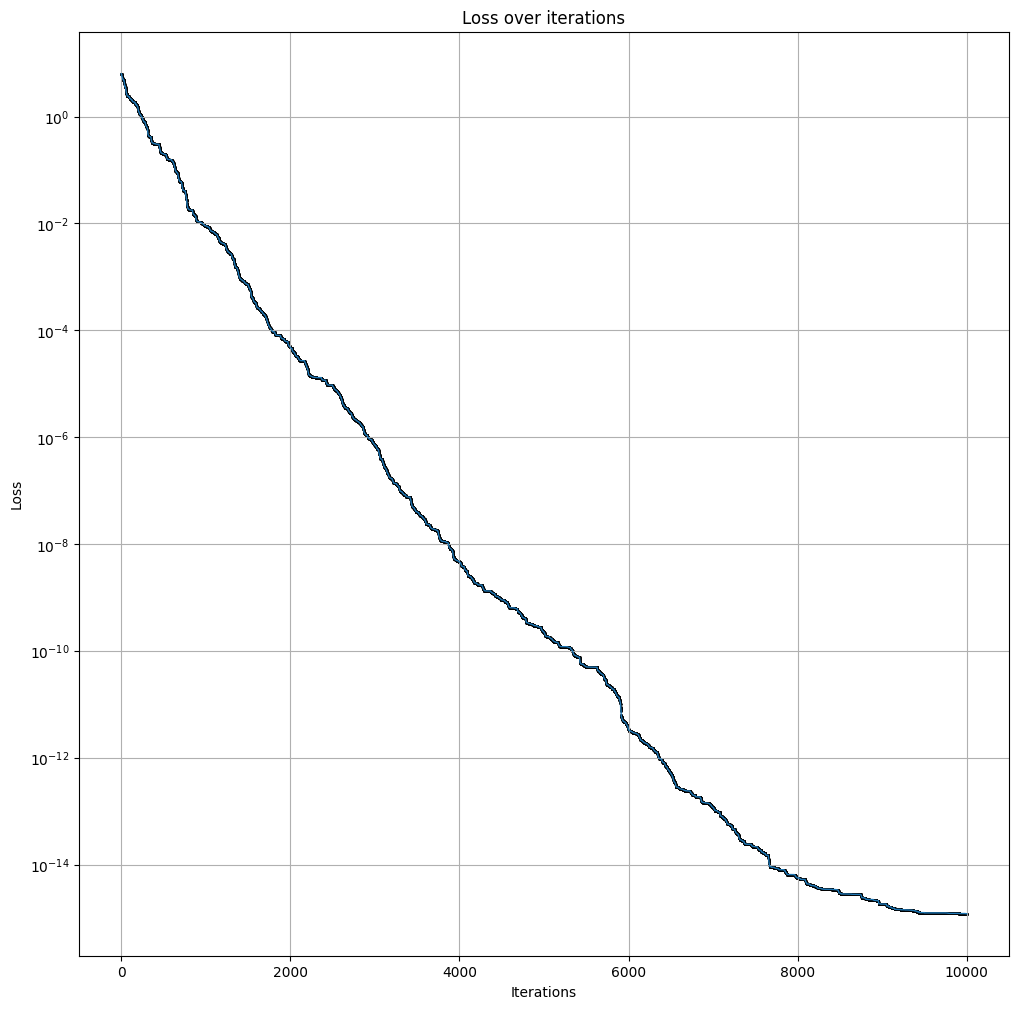

In [30]:
plt.figure(figsize=(12, 12))
plt.plot(data["error"], linewidth=1)
plt.scatter(x=range(len(data["error"])), y=data["error"], s=1, c="black")
plt.title("Loss over iterations")
plt.ylabel("Loss")
plt.yscale("log")
plt.xlabel("Iterations")
plt.grid()